In [3]:
using AxisArrays
using Dates

# Data
data = rand(366, 3)

# Dimensions
datevec = DateTime(2000, 01, 01):Day(1):DateTime(2000, 12, 31)
col1 = :Tmax
col2 = :Tmin
col3 = :Precip

# Creation AxisArray
A = AxisArray(data, Axis{:time}(datevec), Axis{:variable}([col1, col2, col3]))

366×3 AxisArray{Float64,2,Array{Float64,2},Tuple{Axis{:time,StepRange{DateTime,Day}},Axis{:variable,Array{Symbol,1}}}}:
 0.158298   0.231548   0.529243
 0.55319    0.805426   0.518125
 0.625728   0.546051   0.779113
 0.225769   0.672745   0.595877
 0.901832   0.98799    0.931971
 0.0144616  0.598589   0.406052
 0.943027   0.714822   0.225056
 0.112987   0.669268   0.799741
 0.33025    0.323284   0.771204
 0.865653   0.210854   0.462717
 0.770822   0.0665531  0.203157
 0.780028   0.0689347  0.8243  
 0.967891   0.853427   0.282475
 ⋮                             
 0.450743   0.971882   0.950784
 0.961617   0.17193    0.704507
 0.558053   0.800115   0.872517
 0.511723   0.860154   0.358689
 0.993355   0.158188   0.572748
 0.869865   0.316254   0.966513
 0.74185    0.183378   0.192581
 0.899084   0.927194   0.715852
 0.282976   0.977764   0.255786
 0.664091   0.477666   0.361637
 0.464351   0.324093   0.116453
 0.124651   0.406308   0.114795

In [15]:
# Indexing -> Données Température entre 15 mars et 15 juin seulement!
Asub = A[DateTime(2000, 03, 15) .. DateTime(2000, 06, 15), :Tmax]

93-element AxisArray{Float64,1,Array{Float64,1},Tuple{Axis{:time,StepRange{DateTime,Day}}}}:
 0.19509390818954775  
 0.9161399260904637   
 0.2455552383254056   
 0.2609439655211838   
 0.5594619890506676   
 0.8977988659734615   
 0.3105262380196472   
 0.98114064569224     
 0.9109759491288496   
 0.2480767303078275   
 0.686501996444489    
 0.9906077329515213   
 0.9657148568301435   
 ⋮                    
 0.155920805834604    
 0.5241179011747255   
 0.2583370574919024   
 1.1598821844094331e-5
 0.39446685390831693  
 0.0330807446123893   
 0.4848700805777608   
 0.6268102848912536   
 0.9700778357402362   
 0.17427435570788075  
 0.968320369209235    
 0.8908723103144653   

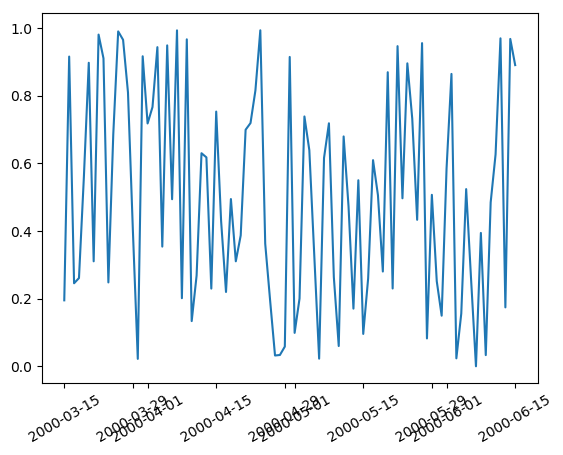

([730194.0, 730208.0, 730211.0, 730225.0, 730239.0, 730241.0, 730255.0, 730269.0, 730272.0, 730286.0], PyCall.PyObject[PyObject Text(730194.0, 0, '2000-03-15'), PyObject Text(730208.0, 0, '2000-03-29'), PyObject Text(730211.0, 0, '2000-04-01'), PyObject Text(730225.0, 0, '2000-04-15'), PyObject Text(730239.0, 0, '2000-04-29'), PyObject Text(730241.0, 0, '2000-05-01'), PyObject Text(730255.0, 0, '2000-05-15'), PyObject Text(730269.0, 0, '2000-05-29'), PyObject Text(730272.0, 0, '2000-06-01'), PyObject Text(730286.0, 0, '2000-06-15')])

In [19]:
using PyPlot
plot(Asub[Axis{:time}][:], Asub)
xticks(rotation=30)

In [22]:
Asub.axes

(Axis{:time,StepRange{DateTime,Day}}(2000-03-15T00:00:00:1 day:2000-06-15T00:00:00), Axis{:variable,Array{Symbol,1}}(Symbol[:Tmax]))

In [25]:
Asub[Axis{:time}][:]

2000-03-15T00:00:00:1 day:2000-06-15T00:00:00

In [33]:
Asub[Axis{:Tmax}][:]

ArgumentError: ArgumentError: no axis of type Axis{:Tmax,T} where T was found

In [44]:
length(Asub[Axis{:time}][:])


93

In [51]:
string(Asub[Axis{:time}][1:5:length(Asub[Axis{:time}])])

"2000-03-15T00:00:00:5 days:2000-06-13T00:00:00"

In [49]:
length(1:5:length(Asub[Axis{:time}][:]))

19

In [53]:
?xticks

search: xticks xticks! ExponentialBackOff




    Get or set the current tick locations and labels of the x-axis.

    Call signatures::

        locs, labels = xticks()           # Get locations and labels

        xticks(ticks, [labels], **kwargs)  # Set locations and labels

    Parameters
    ----------
    ticks : array_like
        A list of positions at which ticks should be placed. You can pass an
        empty list to disable xticks.

    labels : array_like, optional
        A list of explicit labels to place at the given *locs*.

    **kwargs
        :class:`.Text` properties can be used to control the appearance of
        the labels.

    Returns
    -------
    locs
        An array of label locations.
    labels
        A list of `.Text` objects.

    Notes
    -----
    Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
    equivalent of calling `~.Axes.get_xticks` and `~.Axes.get_xticklabels` on
    the current axes.
    Calling this function with arguments is the pyplot equivalent of calli

In [56]:
string.(collect(Asub[Axis{:time}][1:5:length(Asub[Axis{:time}])]))

19-element Array{String,1}:
 "2000-03-15T00:00:00"
 "2000-03-20T00:00:00"
 "2000-03-25T00:00:00"
 "2000-03-30T00:00:00"
 "2000-04-04T00:00:00"
 "2000-04-09T00:00:00"
 "2000-04-14T00:00:00"
 "2000-04-19T00:00:00"
 "2000-04-24T00:00:00"
 "2000-04-29T00:00:00"
 "2000-05-04T00:00:00"
 "2000-05-09T00:00:00"
 "2000-05-14T00:00:00"
 "2000-05-19T00:00:00"
 "2000-05-24T00:00:00"
 "2000-05-29T00:00:00"
 "2000-06-03T00:00:00"
 "2000-06-08T00:00:00"
 "2000-06-13T00:00:00"

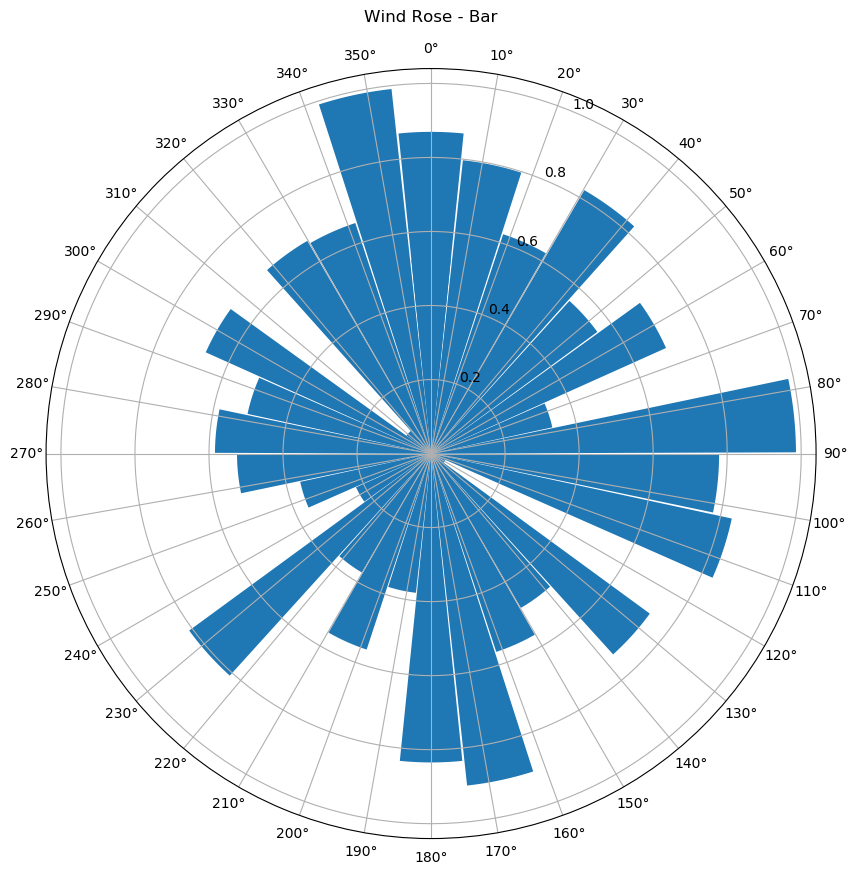

In [62]:
using PyPlot

#################
#  Create Data  #
#################
theta = [0:2pi/30:2pi;]
r = rand(length(theta))
width = 2pi/length(theta) # Desired width of each bar in the bar plot

#########################
##  Windrose Bar Plot  ##
#########################
fig = figure("pyplot_windrose_barplot",figsize=(10,10)) # Create a new figure
ax = PyPlot.axes(polar="true") # Create a polar axis
title("Wind Rose - Bar")
b = PyPlot.bar(theta,r,width=width) # Bar plot

dtheta = 10
ax[:set_thetagrids]([0:dtheta:360-dtheta;]) # Show grid lines from 0 to 360 in increments of dtheta
ax[:set_theta_zero_location]("N") # Set 0 degrees to the top of the plot
ax[:set_theta_direction](-1) # Switch to clockwise
fig[:canvas][:draw]() # Update the figure

In [1]:
using PyPlot
fs = [1 2 4]
allTime = range(0, stop=2, length=200)
t = allTime[1:100]

for f = fs
    y = sin.(2π * f * t)
    plot(t, y, label=string(f, " Hz"))
end
legend()
savefig("basics_julia.pdf")

In [80]:
f2 = "test"
f2*"test"


"testtest"

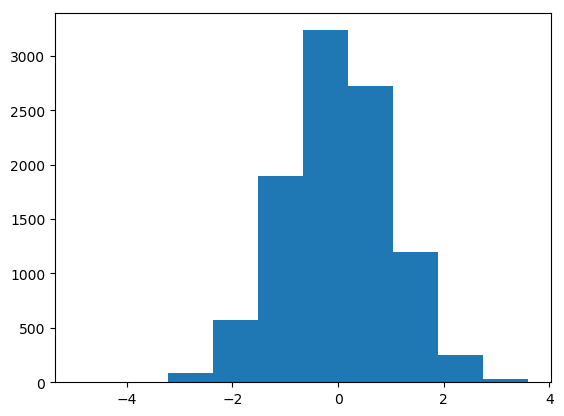

([1.0, 6.0, 88.0, 570.0, 1893.0, 3235.0, 2720.0, 1201.0, 254.0, 32.0], [-4.93392, -4.08026, -3.2266, -2.37293, -1.51927, -0.665609, 0.188053, 1.04172, 1.89538, 2.74904, 3.6027], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x7fd16476bf60>, PyObject <matplotlib.patches.Rectangle object at 0x7fd16476bd30>, PyObject <matplotlib.patches.Rectangle object at 0x7fd1646f5588>, PyObject <matplotlib.patches.Rectangle object at 0x7fd1646f58d0>, PyObject <matplotlib.patches.Rectangle object at 0x7fd1646f5c18>, PyObject <matplotlib.patches.Rectangle object at 0x7fd1646f5f60>, PyObject <matplotlib.patches.Rectangle object at 0x7fd1646ff2e8>, PyObject <matplotlib.patches.Rectangle object at 0x7fd1646ff630>, PyObject <matplotlib.patches.Rectangle object at 0x7fd1646ff978>, PyObject <matplotlib.patches.Rectangle object at 0x7fd1646ffcc0>])

In [7]:
using PyPlot
hist(randn(10_000))